In [1]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 8s 2us/step


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [3]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5,1,'Ground Truth : 9')

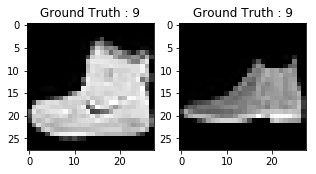

In [4]:
plt.figure(figsize=[5,5])

plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))


plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [5]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [7]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [8]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [9]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [10]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense , Dropout , Flatten
from keras.layers import Conv2D , MaxPooling2D

from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [11]:
batch_size = 64
epochs = 20
num_classes = 10

### Neural Network Architecture

In [13]:
function_model = Sequential()



function_model.add(Conv2D(32 , kernel_size=(3,3) , activation='linear',input_shape=(28,28,1),padding='same'))
function_model.add(LeakyReLU(alpha=0.1))
function_model.add(MaxPooling2D((2,2), padding='same'))



function_model.add(Conv2D(64 , kernel_size=(3,3) , activation='linear',padding='same'))
function_model.add(LeakyReLU(alpha=0.1))
function_model.add(MaxPooling2D((2,2), padding='same'))





function_model.add(Conv2D(128 , kernel_size=(3,3) , activation='linear',padding='same'))
function_model.add(LeakyReLU(alpha=0.1))
function_model.add(MaxPooling2D((2,2), padding='same'))



function_model.add(Flatten())
function_model.add(Dense(128 , activation='linear'))
function_model.add(LeakyReLU(alpha=0.1))


function_model.add(Dense(num_classes ,activation='softmax'))



### Compile the Model

In [14]:
function_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [15]:
function_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73856     
__________

###  Train the Model

In [17]:
fashion_train = function_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 178s 4ms/step - loss: 0.4696 - acc: 0.8272 - val_loss: 0.3325 - val_acc: 0.8848
Epoch 2/20
48000/48000 [==============================] - 182s 4ms/step - loss: 0.2908 - acc: 0.8930 - val_loss: 0.2961 - val_acc: 0.8890
Epoch 3/20
48000/48000 [==============================] - 184s 4ms/step - loss: 0.2429 - acc: 0.9111 - val_loss: 0.2561 - val_acc: 0.9045
Epoch 4/20
48000/48000 [==============================] - 184s 4ms/step - loss: 0.2090 - acc: 0.9223 - val_loss: 0.2392 - val_acc: 0.9118
Epoch 5/20
48000/48000 [==============================] - 187s 4ms/step - loss: 0.1839 - acc: 0.9325 - val_loss: 0.2251 - val_acc: 0.9209
Epoch 6/20
48000/48000 [==============================] - 193s 4ms/step - loss: 0.1613 - acc: 0.9408 - val_loss: 0.2407 - val_acc: 0.9157
Epoch 7/20
48000/48000 [==============================] - 187s 4ms/step - loss: 0.1395 - acc: 0.9474 - val_loss: 0.2272 - 

### Model Evaluation on the Test Set

In [19]:
test_eval = function_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [20]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.43675292928898707
Test accuracy: 0.9135


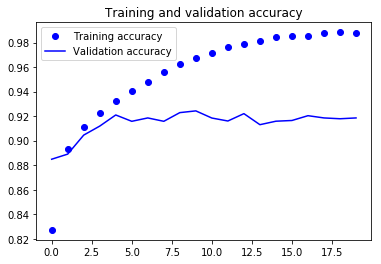

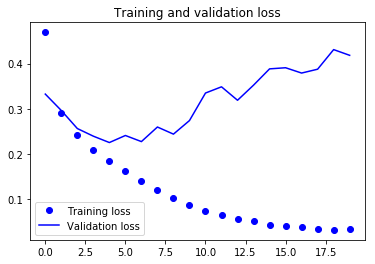

In [21]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Adding Dropout into the Network

In [22]:
batch_size = 64
epochs = 20
num_classes = 10

In [23]:
fashion_model = Sequential()

fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))


fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))


fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))


fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))



fashion_model.add(Dense(num_classes, activation='softmax'))

In [24]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [25]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [26]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 199s 4ms/step - loss: 0.6085 - acc: 0.7723 - val_loss: 0.3887 - val_acc: 0.8558
Epoch 2/20
48000/48000 [==============================] - 194s 4ms/step - loss: 0.3792 - acc: 0.8604 - val_loss: 0.3086 - val_acc: 0.8858
Epoch 3/20
48000/48000 [==============================] - 196s 4ms/step - loss: 0.3298 - acc: 0.8779 - val_loss: 0.2877 - val_acc: 0.8946
Epoch 4/20
48000/48000 [==============================] - 195s 4ms/step - loss: 0.3029 - acc: 0.8875 - val_loss: 0.2675 - val_acc: 0.9009
Epoch 5/20
48000/48000 [==============================] - 194s 4ms/step - loss: 0.2856 - acc: 0.8944 - val_loss: 0.2537 - val_acc: 0.9064
Epoch 6/20
48000/48000 [==============================] - 197s 4ms/step - loss: 0.2717 - acc: 0.8993 - val_loss: 0.2420 - val_acc: 0.9136
Epoch 7/20
48000/48000 [==============================] - 195s 4ms/step - loss: 0.2578 - acc: 0.9031 - val_loss: 0.2323 - 

In [27]:
fashion_model.save("fashion_model_dropout.h5py")

### Model Evaluation on the Test Set

In [28]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)


10000/10000 [==============================] - 12s 1ms/step


In [29]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.21844260849952699
Test accuracy: 0.9189


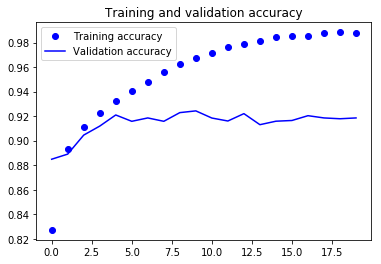

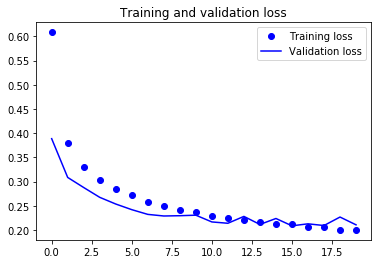

In [30]:
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Predict Labels

In [31]:
predicted_classes = fashion_model.predict(test_X)

In [32]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [33]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9161 correct labels


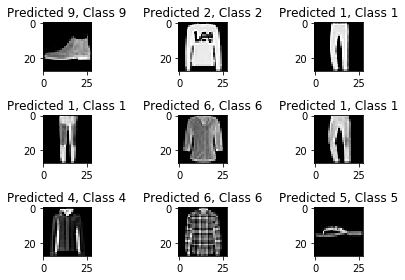

In [35]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 839 incorrect labels


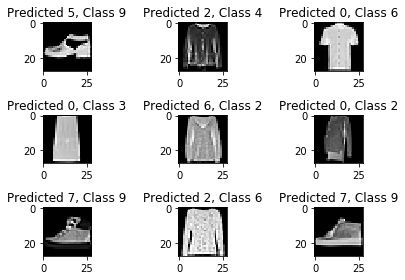

In [37]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

### Classification Report

In [38]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.78      0.91      0.84      1000
    Class 1       0.99      0.99      0.99      1000
    Class 2       0.88      0.86      0.87      1000
    Class 3       0.94      0.92      0.93      1000
    Class 4       0.87      0.88      0.87      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.82      0.72      0.77      1000
    Class 7       0.93      0.99      0.96      1000
    Class 8       0.99      0.98      0.99      1000
    Class 9       0.99      0.94      0.96      1000

avg / total       0.92      0.92      0.92     10000



# https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python